
What is a Support Vector Machine (SVM)?
SVM is a supervised machine learning algorithm used for classification (mostly) and regression tasks.

Imagine you’re trying to draw a line (in 2D) or a plane (in higher dimensions) to separate two groups of points (classes) as cleanly as possible.
SVM finds the best possible boundary (called a hyperplane) that maximizes the separation between the classes.


What are Support Vectors?
Think of support vectors as the most important data points in the training set.

These are the data points that lie closest to the decision boundary (the hyperplane).

They are the ones that "support" or define where the hyperplane should be placed.

If you removed them, the hyperplane would shift. Other points far from the boundary don’t matter as much.

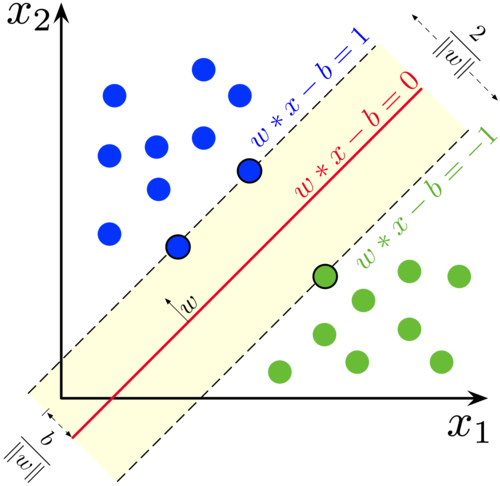

In [3]:
#Step-by-Step: Titanic + SVM
# 🔧 1. Load and Preprocess Titanic Dataset

import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = sns.load_dataset("titanic")

# Keep useful columns
df = df[["survived", "pclass", "sex", "age", "fare"]].dropna()

# Convert categorical 'sex' to numeric
df["sex"] = df["sex"].map({"male": 0, "female": 1})

# Features and target
X = df.drop("survived", axis=1)
y = df["survived"]

# Scale features (important for SVC, especially with RBF)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# 2. Train Linear SVM
linear_svc = SVC(kernel = 'linear')
linear_svc.fit(X_train, y_train)

y_pred_linear = linear_svc.predict(X_test)


# Evaluation
print("🔹 Linear Kernel SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

rbf_svc = SVC(kernel = 'rbf')
rbf_svc.fit(X_train, y_train)

y_pred_rbf = rbf_svc.predict(X_test)



# Evaluation
print("🔸 RBF Kernel SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))

🔹 Linear Kernel SVM
Accuracy: 0.7342657342657343
Confusion Matrix:
 [[69 18]
 [20 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78        87
           1       0.67      0.64      0.65        56

    accuracy                           0.73       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.73      0.73      0.73       143

🔸 RBF Kernel SVM
Accuracy: 0.7342657342657343
Confusion Matrix:
 [[68 19]
 [19 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        87
           1       0.66      0.66      0.66        56

    accuracy                           0.73       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.73      0.73      0.73       143



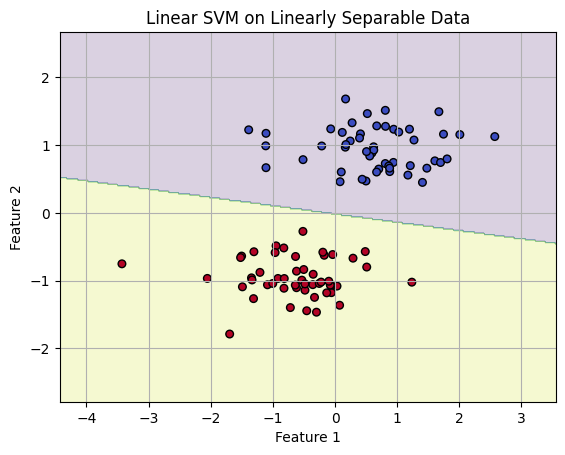

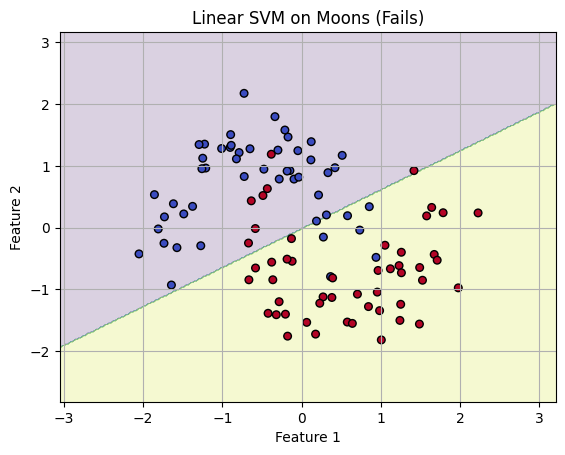

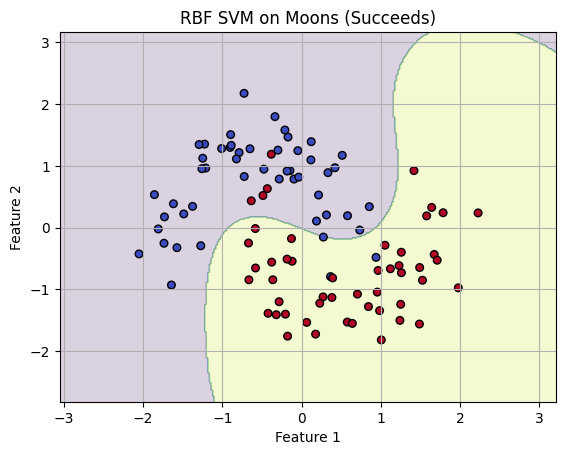

In [20]:
#Goals:
#Use make_blobs() and make_moons() from sklearn.datasets
#Train SVC(kernel='linear') and SVC(kernel='rbf')

#Visualize:
#Decision boundaries
#Margins (when possible)
#How data shape affects kernel choice

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

#  Visual Helper Function to Plot Decision Boundaries

def plot_svm_decision_boundary(model, X, y, title):
    # Create meshgrid for background colors
    h = 0.02                                            # h is the step size (smaller means smoother curves but more computation).
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 #This step creates a grid of points that span the same space as your data (with a little padding).
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # xx, yy are 2D arrays representing all the x and y coordinates across the grid.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict for grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # np.c_ combines xx and yy into coordinate pairs.
                                                    # .ravel() flattens the arrays so they can be used in model.predict.
    Z = Z.reshape(xx.shape)                         # .reshape(xx.shape) is needed so the predictions match the grid shape again.      
    #Now Z contains the predicted class (0 or 1) for each pixel in the grid.
    
    # Plot background, data points, and margins
    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()


#  Linearly Separable Data (make_blobs)
X_blob, y_blob = make_blobs(n_samples = 100, centers = 2, random_state= 6, cluster_std = 1.0)
X_blob = StandardScaler().fit_transform(X_blob)


# Train Linear SVM
svm_linear_blob = SVC(kernel='linear', C=1.0)
svm_linear_blob.fit(X_blob, y_blob)

# Plot
plot_svm_decision_boundary(svm_linear_blob, X_blob, y_blob, "Linear SVM on Linearly Separable Data")


# B. Non-Linearly Separable Data (make_moons)
# Make moons (non-linear)
X_moons, y_moons = make_moons(n_samples=100, noise=0.2, random_state=42)
X_moons = StandardScaler().fit_transform(X_moons)

# Linear SVM
svm_linear_moons = SVC(kernel='linear', C=1.0)
svm_linear_moons.fit(X_moons, y_moons)

# RBF SVM
svm_rbf_moons = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_rbf_moons.fit(X_moons, y_moons)

# Plot both
plot_svm_decision_boundary(svm_linear_moons, X_moons, y_moons, "Linear SVM on Moons (Fails)")
plot_svm_decision_boundary(svm_rbf_moons, X_moons, y_moons, "RBF SVM on Moons (Succeeds)")


In [ ]:
Scenario	                                    What You’ll Notice
Linear SVM on blobs	                            Works perfectly – straight line splits data
Linear SVM on moons	                            Fails – tries a line where one won't work
RBF SVM on moons	                            Curves around the data – captures non-linearity
Changing C	                                    Controls  how much error/margin softness is allowed